<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tabulate import tabulate
import seaborn as sns

##**Problem 1-7**
*Create a K-means scratch*

In [ ]:
class ScratchKMeans():

    def __init__(self, n_clusters=2, n_init=20, n_iter=100, verbose=False):
    
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        
        self.best_sse = 10**20
        self.record_myu = None
        self.record_cluster = None

    '''---------------------------------------
    Problem 2: Creating a Function to Find SSE
    ---------------------------------------'''
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    '''-------------------------------
    Problem 3: Assignment to a cluster
    -------------------------------'''
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j

  
    '''-------------------------------
    Problem 4: Moving the center point
    -------------------------------'''
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)



    '''------------------
    Problem 5: Repetition
    ------------------'''
    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("Initialization: %s Training Count: %s Best SSE: %s"%(i,j,self.best_sse))


    
    '''------------------
    Problem 7: Estimation
    ------------------'''
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

##**Problem 8:** Implementation of the elbow method

In [ ]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
print("X shape: {} and type: {}".format(X.shape, type(X)))


X_train, X_valid = train_test_split(X,train_size=0.8,random_state=None)

clf = ScratchKMeans(n_clusters=4,n_init=5, n_iter=100,verbose=True)
clf.fit(X_train)

pred = clf.predict(X_valid)
print(pred)

X shape: (100, 2) and type: <class 'numpy.ndarray'>
Initialization: 0 Training Count: 0 Best SSE: 1059.4958470621107
Initialization: 0 Training Count: 1 Best SSE: 195.90688370244766
Initialization: 0 Training Count: 2 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 3 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 4 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 5 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 6 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 7 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 8 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 9 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 10 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 11 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 12 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 13 Best SSE: 37.914893517857024
Initialization: 0 Training Count: 

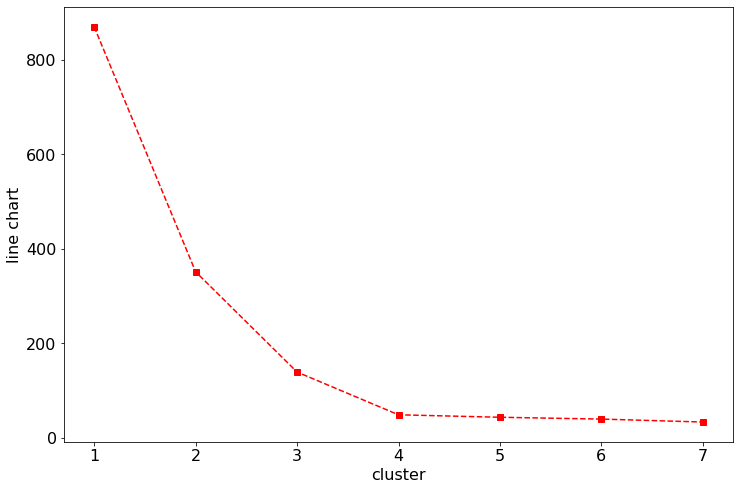

In [ ]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.xlabel('cluster')
plt.ylabel('line chart')
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

##**Problem 10:** Select the number of clusters k

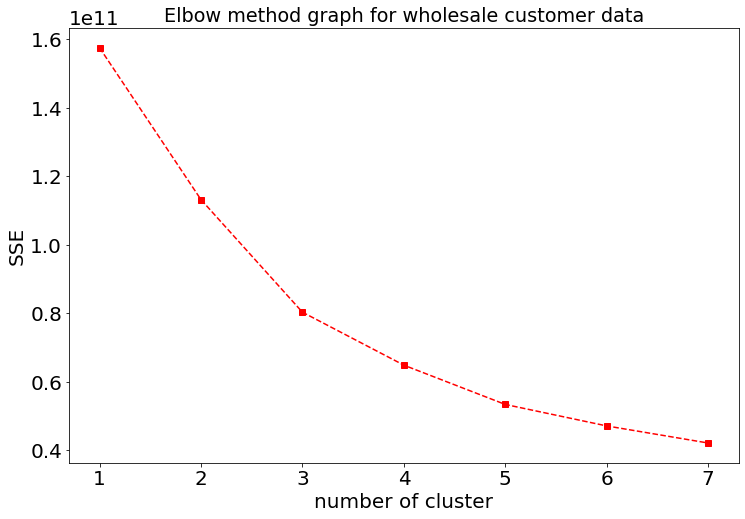

Elbow method graph for wholesale customer data k = 2 is most optimal. Because the bending of graph is occured at k = 2.


In [ ]:
data = pd.read_csv('Wholesale customers data.csv')
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values



elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 16
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--')
plt.title("Elbow method graph for wholesale customer data")
plt.xlabel('number of cluster')
plt.ylabel("SSE")
plt.show()

print("Elbow method graph for wholesale customer data k = 2 is most optimal. Because the bending of graph is occured at k = 2.")


##**Problem 11:** Comparison with known groups

In [ ]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=False)
clf.fit(X)
pred = clf.predict(X)
summary_df = pd.DataFrame({'pred':pred,'Region':data['Region'],'Channel':data['Channel'],})

In [ ]:
print('predicted value / Region')
table1 = pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)
#print(table1)
table1

predicted value / Region


pred,0.0,1.0,2.0,3.0
Region,,,,
1,2,16,10,49
2,1,12,4,30
3,8,67,44,197


In [ ]:
print('predicted value / channel')
table2 = pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)
#print(table2)
table2

predicted value / channel


pred,0.0,1.0,2.0,3.0
Channel,,,,
1,1,13,50,234
2,10,82,8,42


##**Problem 12:** Useful information for wholesalers

In [ ]:
data['cluster'] = pred

table = data.groupby('cluster').agg(['mean','max','min'])
#print(table)
table

Channel            Region                 Fresh                 \
             mean max min      mean max min          mean     max    min   
cluster                                                                    
0.0      1.909091   2   1  2.545455   3   1  19888.272727   44466     85   
1.0      1.863158   2   1  2.536842   3   1   4808.842105   22039     18   
2.0      1.137931   2   1  2.586207   3   1  36144.482759  112151  22096   
3.0      1.152174   2   1  2.536232   3   1   9087.463768   23257      3   

                 Milk  ... Grocery       Frozen             Detergents_Paper  \
                 mean  ...     min         mean    max  min             mean   
cluster                ...                                                     
0.0      36142.363636  ...   20170  6328.909091  36534   36     21417.090909   
1.0      10525.010526  ...    8852  1462.589474  10155   25      7302.400000   
2.0       5471.465517  ...     471  6298.655172  60869  127      1064.000000   
3.0       3027.427536  ...       3  2817.985507  35009   47      1003.003623   

                      Delicassen              
           max  min         mean    max  min  
cluster                                       
0.0      40827  239  8414.000000  47943  903  
1.0      17740  241  1650.884211  14472    3  
2.0       5058   10  2316.724138  14351    3  
3.0       5316    3  1040.525362   7844    3  

[4 rows x 24 columns]